In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

features = pd.read_csv("data/combinedData.csv")

features = features.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
features.head()

,player,class,season,pos,school_name,conf_abbr,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
0,Stephen Curry,JR,2008-09,G,Davidson,Southern,34.0,1145.0,312,687,182,351,130,336,220,251,21.0,130.0,151,189,86,8,126.0,81.0,974,NaN,NaN,NaN,NaN,0.604,0.549,NaN,NaN,6.9,40.2,NaN,0.6,13.5,38.3,NaN,NaN,6.4,3.6,9.9,NaN,2009,1,7,1
1,J.J. Redick,SR,2005-06,G,Duke,ACC,36.0,1336.0,302,643,163,313,139,330,221,256,7.0,64.0,71,95,52,2,90.0,54.0,964,NaN,NaN,NaN,NaN,0.630,0.578,NaN,NaN,3.1,15.8,NaN,0.1,10.5,31.5,NaN,NaN,6.7,1.0,7.8,NaN,2006,1,11,0
2,Justin Wright-Foreman,SR,2018-19,G,Hofstra,CAA,35.0,1321.0,330,646,220,387,110,259,178,206,12.0,129.0,141,102,30,7,91.0,67.0,948,28.9,7.0,-3.7,3.2,0.637,0.596,1.2,11.5,6.6,17.4,1.3,0.6,10.9,33.0,123.8,108.7,6.3,1.0,7.4,844.0,2019,2,53,0
3,Doug McDermott,SR,2013-14,F,Creighton,Big East,35.0,1181.0,330,627,234,413,96,214,178,206,57.0,187.0,244,55,8,5,62.0,67.0,934,32.8,9.8,-1.6,8.2,0.644,0.603,6.4,17.8,12.6,11.5,0.4,0.5,7.9,36.2,127.4,106.0,6.3,1.4,7.7,788.0,2014,1,11,0
4,Stephen Curry,SO,2007-08,G,Davidson,Southern,36.0,1193.0,317,656,155,287,162,369,135,151,28.0,137.0,165,104,73,14,93.0,85.0,931,NaN,NaN,NaN,NaN,0.640,0.607,NaN,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,7.0,3.3,10.3,NaN,2009,1,7,1


In [202]:
features.describe()

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,855.000000,743.000000,743.000000,743.000000,1537.000000,1537.000000,855.000000,855.000000,1339.000000,1339.000000,855.00000,1339.000000,1537.000000,1339.000000,855.000000,855.000000,1537.000000,1537.000000,1537.000000,855.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,32.715029,923.905010,148.290176,308.607027,115.977228,220.934288,32.312947,87.672739,91.301236,124.964216,52.164606,125.005856,177.170462,71.150293,33.904359,25.411191,63.160052,72.256994,420.194535,21.157661,4.011171,3.144145,7.154778,0.566571,0.531889,6.634152,15.796257,11.359149,14.715907,2.09193,2.789022,15.210670,23.093876,113.431579,97.387135,2.361223,1.823422,4.185231,414.461988,2011.523748,1.546519,32.145738,0.047495
std,5.154462,276.627857,61.284209,127.608411,54.633689,98.062030,30.024388,75.467658,48.704743,62.068852,32.159204,57.870978,83.929206,53.276672,18.652750,25.505567,26.116409,21.195203,178.031377,5.378865,2.900817,2.374883,3.520548,0.052379,0.057562,4.050177,5.631031,4.422831,8.616445,0.93558,2.801309,4.181573,4.644153,10.382418,6.122345,1.421851,0.919556,1.944911,169.916099,4.525491,0.497993,16.720344,0.212765
min,3.000000,24.000000,1.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-1.700000,-10.500000,-3.700000,-6.900000,0.250000,0.200000,0.300000,5.600000,3.000000,0.000000,0.00000,0.000000,4.800000,8.300000,54.200000,77.700000,-0.700000,0.000000,-0.100000,2.000000,2003.000000,1.000000,1.000000,0.000000
25%,31.000000,785.000000,107.000000,224.000000,76.000000,149.000000,4.000000,15.000000,54.000000,79.000000,25.000000,84.000000,115.000000,33.000000,20.000000,7.000000,45.000000,60.000000,298.000000,17.800000,2.150000,1.600000,4.900000,0.536000,0.496000,3.100000,11.500000,7.600000,8.500000,1.50000,0.800000,12.400000,19.900000,108.000000,93.450000,1.300000,1.200000,2.900000,306.000000,2008.000000,1.000000,19.000000,0.000000
50%,34.000000,989.000000,153.000000,315.000000,115.000000,223.000000,26.000000,76.000000,87.000000,120.000000,47.000000,118.000000,164.000000,58.000000,31.000000,17.000000,64.000000,73.000000,433.000000,21.200000,4.100000,2.900000,7.400000,0.567000,0.531000,6.000000,14.800000,11.000000,12.700000,1.90000,1.800000,14.700000,22.900000,114.100000,97.900000,2.300000,1.700000,4.200000,425.000000,2011.000000,2.000000,33.000000,0.000000
75%,36.000000,1120.000000,190.000000,400.000000,153.000000,286.000000,52.000000,144.000000,123.000000,165.000000,74.000000,159.000000,227.000000,95.000000,45.000000,34.000000,79.000000,87.000000,543.000000,24.700000,5.850000,4.500000,9.400000,0.599000,0.567000,9.700000,19.600000,14.700000,19.400000,2.55000,3.800000,17.500000,26.200000,120.000000,101.600000,3.300000,2.300000,5.500000,535.500000,2015.000000,2.000000,46.000000,0.000000
max,40.000000,1474.000000,330.000000,703.000000,297.000000,615.000000,162.000000,380.000000,249.000000,336.000000,197.000000,369.000000,504.000000,331.000000,126.000000,186.000000,170.000000,138.000000,974.000000,40.800000,12.800000,11.700000,20.000000,0.740000,0.728000,23.100000,35.600000,25.700000,53.300000,8.00000,18.800000,40.700000,39.300000,144.700000,118.700000,7.000000,6.700000,11.300000,947.000000,2019.000000,2.000000,60.000000,1.000000


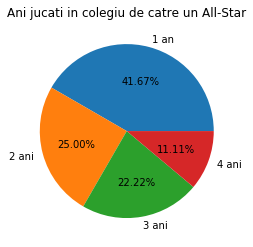

In [203]:
allStars = features[features["allStar"] == 1]
allStars = allStars.groupby(["year_drafted", "round", "pick_overall"])["player"].count()
allStars = allStars.value_counts()
plt.pie(allStars, labels=["1 an", "2 ani", "3 ani", "4 ani"], autopct='%1.2f%%')
plt.title("Ani jucati in colegiu de catre un All-Star")
plt.show()

In [204]:
# features = features.dropna()
features = features.fillna(features.median())
features.describe()

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,32.715029,923.905010,148.290176,308.607027,115.977228,220.934288,32.312947,87.672739,91.301236,124.964216,52.164606,125.005856,177.170462,71.150293,33.904359,25.411191,63.160052,72.256994,420.194535,21.176448,4.057059,3.018022,7.281457,0.566571,0.531889,6.352765,15.354196,11.312882,14.456213,2.006766,2.661614,15.210670,23.068900,113.728172,97.614704,2.361223,1.823422,4.185231,419.137931,2011.523748,1.546519,32.145738,0.047495
std,5.154462,276.627857,61.284209,127.608411,54.633689,98.062030,30.024388,75.467658,48.704743,62.068852,32.159204,57.870978,83.929206,53.276672,18.652750,25.505567,26.116409,21.195203,178.031377,4.010790,2.016657,1.655131,2.449971,0.052379,0.057562,3.036404,4.227854,4.129688,8.070260,0.704103,2.635452,4.181573,4.334986,7.748744,4.572219,1.421851,0.919556,1.944911,126.805643,4.525491,0.497993,16.720344,0.212765
min,3.000000,24.000000,1.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-1.700000,-10.500000,-3.700000,-6.900000,0.250000,0.200000,0.300000,5.600000,3.000000,0.000000,0.000000,0.000000,4.800000,8.300000,54.200000,77.700000,-0.700000,0.000000,-0.100000,2.000000,2003.000000,1.000000,1.000000,0.000000
25%,31.000000,785.000000,107.000000,224.000000,76.000000,149.000000,4.000000,15.000000,54.000000,79.000000,25.000000,84.000000,115.000000,33.000000,20.000000,7.000000,45.000000,60.000000,298.000000,20.500000,4.100000,2.900000,7.400000,0.536000,0.496000,5.300000,14.000000,8.100000,9.200000,1.800000,0.900000,12.400000,20.400000,112.800000,96.900000,1.300000,1.200000,2.900000,407.000000,2008.000000,1.000000,19.000000,0.000000
50%,34.000000,989.000000,153.000000,315.000000,115.000000,223.000000,26.000000,76.000000,87.000000,120.000000,47.000000,118.000000,164.000000,58.000000,31.000000,17.000000,64.000000,73.000000,433.000000,21.200000,4.100000,2.900000,7.400000,0.567000,0.531000,6.000000,14.800000,11.000000,12.700000,1.900000,1.800000,14.700000,22.900000,114.100000,97.900000,2.300000,1.700000,4.200000,425.000000,2011.000000,2.000000,33.000000,0.000000
75%,36.000000,1120.000000,190.000000,400.000000,153.000000,286.000000,52.000000,144.000000,123.000000,165.000000,74.000000,159.000000,227.000000,95.000000,45.000000,34.000000,79.000000,87.000000,543.000000,21.800000,4.100000,2.900000,7.400000,0.599000,0.567000,6.800000,15.700000,14.100000,18.100000,2.000000,3.400000,17.500000,25.800000,115.300000,98.500000,3.300000,2.300000,5.500000,446.000000,2015.000000,2.000000,46.000000,0.000000
max,40.000000,1474.000000,330.000000,703.000000,297.000000,615.000000,162.000000,380.000000,249.000000,336.000000,197.000000,369.000000,504.000000,331.000000,126.000000,186.000000,170.000000,138.000000,974.000000,40.800000,12.800000,11.700000,20.000000,0.740000,0.728000,23.100000,35.600000,25.700000,53.300000,8.000000,18.800000,40.700000,39.300000,144.700000,118.700000,7.000000,6.700000,11.300000,947.000000,2019.000000,2.000000,60.000000,1.000000


In [205]:
import random

classRatio = 0.1
allStars = features[features["allStar"] == 1]
numberAllStars = allStars["player"].count()
theRest = features[features["allStar"] == 0]
theRest = theRest.groupby(["year_drafted", "round", "pick_overall", "player"], as_index=False).mean()
# numberRest = int(np.ceil(numberAllStars/classRatio))
# theRest = theRest.sample(n=numberRest, random_state=1)
features = pd.concat([allStars, theRest])
print("Class ratio: ", numberAllStars/numberRest)
print("All-Stars: ", numberAllStars)
print("Rest: ", numberRest)
print("Total: ", numberAllStars + numberRest)
theRest.head()

Class ratio:  0.1
All-Stars:  73
Rest:  730
Total:  803


/home/andrei/Facultate/tcri-all-star-prediction/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,year_drafted,round,pick_overall,player,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,allStar
0,2003,1,7,Kirk Hinrich,37.0,1241.0,232.0,488.0,143.0,269.0,89.0,219.0,88.0,125.0,38.0,101.0,139.0,130.0,69.0,16.0,83.0,78.0,641.0,21.2,4.1,2.9,7.4,0.586,0.567,6.0,14.8,11.0,12.7,1.9,1.8,13.2,22.9,114.1,97.9,3.5,2.8,6.3,425.0,0.0
1,2003,1,8,T.J. Ford,33.0,1110.0,159.0,397.0,141.0,329.0,18.0,68.0,159.0,194.0,21.0,107.0,128.0,254.0,66.0,5.0,107.0,83.0,495.0,21.2,4.1,2.9,7.4,0.506,0.423,6.0,14.8,11.0,12.7,1.9,1.8,17.9,22.9,114.1,97.9,1.3,3.0,4.3,425.0,0.0
2,2003,1,9,Mike Sweetney,34.0,1100.0,264.0,483.0,264.0,480.0,0.0,3.0,248.0,336.0,137.0,215.0,352.0,66.0,50.0,109.0,71.0,95.0,776.0,21.2,4.1,2.9,7.4,0.604,0.547,6.0,14.8,17.2,14.9,1.9,7.0,9.9,29.8,114.1,97.9,4.8,4.9,9.8,425.0,0.0
3,2003,1,10,Jarvis Hayes,27.0,872.0,185.0,368.0,131.0,241.0,54.0,127.0,69.0,88.0,34.0,85.0,119.0,54.0,31.0,12.0,38.0,64.0,493.0,21.2,4.1,2.9,7.4,0.602,0.576,6.0,14.8,7.5,12.6,1.9,0.9,8.5,25.0,114.1,97.9,2.9,1.1,4.0,425.0,0.0
4,2003,1,12,Nick Collison,38.0,1232.0,281.0,507.0,268.0,469.0,13.0,38.0,127.0,200.0,125.0,255.0,380.0,84.0,44.0,74.0,92.0,95.0,702.0,21.2,4.1,2.9,7.4,0.583,0.567,6.0,14.8,11.0,12.7,1.9,1.8,13.3,22.9,114.1,97.9,3.8,5.4,9.1,425.0,0.0


In [206]:
allStars.head(numberAllStars)

,player,class,season,pos,school_name,conf_abbr,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
0,Stephen Curry,JR,2008-09,G,Davidson,Southern,34.0,1145.0,312,687,182,351,130,336,220,251,21.0,130.0,151,189,86,8,126.0,81.0,974,21.2,4.1,2.9,7.4,0.604,0.549,6.0,14.8,6.9,40.2,1.9,0.6,13.5,38.3,114.1,97.9,6.4,3.6,9.9,425.0,2009,1,7,1
4,Stephen Curry,SO,2007-08,G,Davidson,Southern,36.0,1193.0,317,656,155,287,162,369,135,151,28.0,137.0,165,104,73,14,93.0,85.0,931,21.2,4.1,2.9,7.4,0.640,0.607,6.0,14.8,11.0,12.7,1.9,1.8,11.3,22.9,114.1,97.9,7.0,3.3,10.3,425.0,2009,1,7,1
7,Kevin Durant,FR,2006-07,F,Texas,Big 12,35.0,1255.0,306,647,224,444,82,203,209,256,106.0,284.0,390,46,66,67,99.0,71.0,903,21.2,4.1,2.9,7.4,0.587,0.536,6.0,14.8,16.5,8.6,1.9,3.5,11.4,33.2,114.1,97.9,4.7,4.1,8.8,425.0,2007,1,2,1
19,Blake Griffin,SO,2008-09,F,Oklahoma,Big 12,35.0,1165.0,300,459,297,451,3,8,191,324,135.0,369.0,504,80,39,41,116.0,89.0,794,21.2,4.1,2.9,7.4,0.648,0.657,6.0,14.8,24.0,16.3,1.9,2.6,15.9,30.8,114.1,97.9,6.1,3.5,9.7,425.0,2009,1,1,1
21,Damian Lillard,JR,2011-12,G,Weber State,Big Sky,32.0,1105.0,231,495,137,265,94,230,228,257,17.0,144.0,161,128,47,7,74.0,62.0,784,34.0,10.3,-1.4,8.8,0.635,0.562,1.9,15.8,9.0,27.1,2.5,0.7,10.7,33.0,128.4,101.6,6.7,1.4,8.0,746.0,2012,1,6,1
25,Carmelo Anthony,FR,2002-03,F,Syracuse,Big East,35.0,1274.0,277,612,221,446,56,166,168,238,101.0,248.0,349,77,55,30,77.0,77.0,778,21.2,4.1,2.9,7.4,0.537,0.498,6.0,14.8,14.0,11.9,1.9,1.5,9.6,29.3,114.1,97.9,2.7,3.1,5.8,425.0,2003,1,3,1
44,Klay Thompson,JR,2010-11,G,Washington State,Pac-10,34.0,1179.0,240,551,142,305,98,246,155,185,25.0,153.0,178,127,56,32,115.0,99.0,733,26.1,6.8,3.2,10.1,0.574,0.525,2.6,14.0,8.6,25.0,2.8,3.1,15.3,32.8,109.8,95.8,3.7,2.2,5.8,694.0,2011,1,11,1
48,Stephen Curry,FR,2006-07,G,Davidson,Southern,34.0,1049.0,242,523,120,224,122,299,124,145,32.0,125.0,157,95,62,6,95.0,87.0,730,21.2,4.1,2.9,7.4,0.617,0.579,6.0,14.8,11.0,12.7,1.9,1.8,13.8,22.9,114.1,97.9,4.6,2.4,7.0,425.0,2009,1,7,1
65,Dwyane Wade,JR,2002-03,G,Marquette,CUSA,33.0,1058.0,251,501,237,457,14,44,194,249,60.0,149.0,209,145,71,43,107.0,76.0,710,21.2,4.1,2.9,7.4,0.573,0.515,6.0,14.8,11.0,12.7,1.9,1.8,14.7,22.9,114.1,97.9,3.6,2.9,6.5,425.0,2003,1,5,1
73,James Harden,SO,2008-09,G,Arizona State,Pac-10,35.0,1254.0,221,452,163,289,58,163,204,270,48.0,147.0,195,148,59,11,118.0,99.0,704,21.2,4.1,2.9,7.4,0.607,0.553,6.0,14.8,10.4,29.2,1.9,0.8,16.9,32.5,114.1,97.9,5.1,2.0,7.2,425.0,2009,1,3,1


In [207]:
# create per_game stats and drop the normal stats
features["pts_pg"] = features["pts"] / features["g"]
features["fg_p"] = features["fg"] / features["fga"]
features["fg2_p"] = features["fg2"] / features["fg2a"]
features["fg3_p"] = features["fg3"] / ( features["fg3a"]  +.000000001)
features["ft_p"] = features["ft"] / (features["fta"] + +.000000001)
features["trb_p"] = features["trb"] / features["g"]
features["ast_p"] = features["ast"] / features["g"]
features["stl_p"] = features["stl"] / features["g"]
features["blk_p"] = features["blk"] / features["g"]

list_normal_stats = ["pts", "fg", "fg2a", "fg3a", "ft", "trb", "ast", "stl", "blk",
                    "fga", "fg2", "fg3", "fta", "orb", "drb", "tov", "pf", "g", "mp"]

# features = features.drop(columns=list_normal_stats)

In [208]:
mean_statistics = features.groupby(["allStar"]).mean()
mean_statistics.head(40)

,ast,ast_pct,blk,blk_pct,bpm,dbpm,def_rtg,drb,drb_pct,dws,efg_pct,fg,fg2,fg2a,fg3,fg3a,fga,ft,fta,g,mp,obpm,off_rtg,orb,orb_pct,ows,per,pf,pick_overall,pprod,pts,round,stl,stl_pct,tov,tov_pct,trb,trb_pct,ts_pct,usg_pct,ws,year_drafted,pts_pg,fg_p,fg2_p,fg3_p,ft_p,trb_p,ast_p,stl_p,blk_p
allStar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,73.530337,14.453091,26.038185,2.770294,7.365040,3.092566,97.550965,127.122717,15.487095,1.830171,0.531738,152.249144,119.124229,227.290525,33.124914,90.240325,317.530850,93.769321,128.735445,32.825999,938.501712,4.084923,113.794663,52.408562,6.494900,2.396142,21.303850,72.818693,30.328767,423.579937,431.392523,1.494863,34.472917,2.005537,65.251455,15.179192,179.531279,11.338662,0.566484,23.293647,4.226855,2011.731164,13.145242,0.486107,0.522914,0.322823,0.725257,5.483840,2.235096,1.050594,0.801901
1.0,86.986301,17.897260,33.986301,2.728767,8.136986,3.241096,96.415068,156.630137,16.031507,2.567123,0.553808,169.178082,138.712329,254.068493,30.465753,80.863014,334.931507,114.205479,156.136986,33.027397,965.260274,4.565753,114.953425,66.493151,6.563014,3.083562,22.726027,78.465753,11.561644,443.082192,483.027397,1.109589,42.767123,2.164384,73.643836,15.812329,223.123288,12.980822,0.589521,24.347945,5.646575,2008.287671,14.597018,0.514707,0.544277,0.292954,0.721872,6.626119,2.630329,1.290684,0.993383


In [209]:
def plotGroupBarPlot(data, feature_list):
    df = data.loc[feature_list]
    df.plot(kind="bar")
    plt.show()

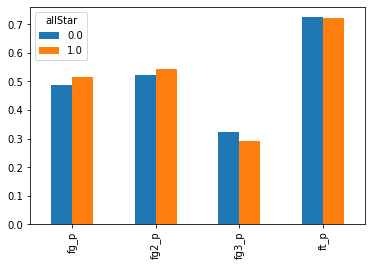

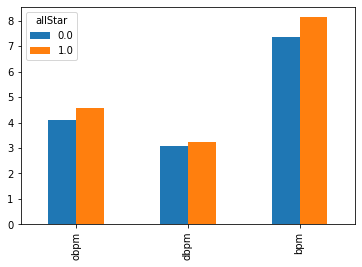

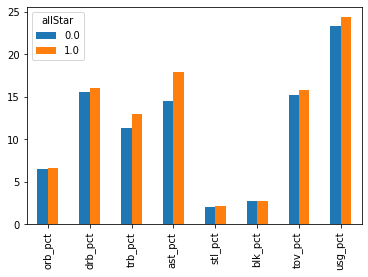

In [210]:
plotGroupBarPlot(mean_statistics.T, ["fg_p", "fg2_p", "fg3_p", "ft_p"])
plotGroupBarPlot(mean_statistics.T, ["obpm", "dbpm", "bpm"])
plotGroupBarPlot(mean_statistics.T, ["orb_pct", "drb_pct", "trb_pct", "ast_pct",
                                     "stl_pct", "blk_pct", "tov_pct", "usg_pct"])

In [211]:
features.to_csv("dataMeanCompleted.csv")

In [212]:
# test = features.groupby(["year_drafted", "round", "pick_overall", "player", "school_name"], as_index=False).mean()
# test.to_csv("dataMeanPerCollege.csv")

In [246]:
from sklearn.metrics import classification_report as scor
from sklearn.metrics import roc_curve, auc, roc_auc_score

def rocCurve(test_labels, predictions):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions)
    auc = roc_auc_score(test_labels, predictions)
    print('AUC: %.3f' % auc)
    ns_probs = [0 for _ in range(len(test_labels))]
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(test_labels, predictions)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    

def evaluate(model, test_features, test_labels, treshold):
#     print("Test labels",test_labels)
    predictions = model.predict(test_features)
#     print("Predictions",predictions)
    print(scor(test_labels, np.where(predictions > treshold, 1, 0),
                target_names = ["NOT All-Star", "All-Star"]))
    rocCurve(test_labels, predictions)

In [214]:
def printFeatureImportance(rf, feature_list):
    importances = list(rf.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return feature_importances

In [215]:
def getTrainTest(features):
    np_labels = np.array(features["allStar"])
    temp_features = features.drop(columns=["allStar"])
    feature_list = list(features.columns)
    np_features = np.array(temp_features)
    train_features, test_features, train_labels, test_labels = train_test_split(np_features, 
                                                                                np_labels,
                                                                                test_size = 0.25,
                                                                                random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def randomForest_train_variableImportane(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    rf = RandomForestClassifier(n_estimators= 200, random_state=42)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list
    

In [217]:
features.columns

Index(['allStar', 'ast', 'ast_pct', 'blk', 'blk_pct', 'bpm', 'class',
       'conf_abbr', 'dbpm', 'def_rtg', 'drb', 'drb_pct', 'dws', 'efg_pct',
       'fg', 'fg2', 'fg2a', 'fg3', 'fg3a', 'fga', 'ft', 'fta', 'g', 'mp',
       'obpm', 'off_rtg', 'orb', 'orb_pct', 'ows', 'per', 'pf', 'pick_overall',
       'player', 'pos', 'pprod', 'pts', 'round', 'school_name', 'season',
       'stl', 'stl_pct', 'tov', 'tov_pct', 'trb', 'trb_pct', 'ts_pct',
       'usg_pct', 'ws', 'year_drafted', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p'],
      dtype='object')

In [218]:
list_meta_data = ['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr']
list_numeric_features = ['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod',
       'round', 'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p']
fetures_select_all = list_numeric_features + ["allStar"]

In [219]:
rf_base, test_features_base, test_labels_base, feature_list_base = randomForest_train_variableImportane(features[fetures_select_all])

In [220]:
treshold = 0.5
evaluate(rf_base, test_features_base, test_labels_base, treshold)
feature_importans = printFeatureImportance(rf_base, feature_list_base)

              precision    recall  f1-score   support

NOT All-Star       0.88      0.97      0.93       142
    All-Star       0.56      0.22      0.31        23

    accuracy                           0.87       165
   macro avg       0.72      0.59      0.62       165
weighted avg       0.84      0.87      0.84       165

Variable: pick_overall         Importance: 0.12
Variable: ws                   Importance: 0.11
Variable: dws                  Importance: 0.07
Variable: trb_p                Importance: 0.06
Variable: pts_pg               Importance: 0.05
Variable: ows                  Importance: 0.04
Variable: fg3_p                Importance: 0.04
Variable: stl_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: blk_pct              Importance: 0.03
Variable: ft_p                 Importance: 0.03
Variable: ast_p                Importance: 0.03
V

In [221]:
# we take the firs 10 most important features
list_selected_features = [x[0] for x in feature_importans[:10]]
list_selected_features.append("allStar")

In [222]:
rf_top, test_features_top, test_labels_top, feature_list_top = randomForest_train_variableImportane(features[list_selected_features])

In [223]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)
printFeatureImportance(rf_top, feature_list_top)

              precision    recall  f1-score   support

NOT All-Star       0.89      0.96      0.93       142
    All-Star       0.54      0.30      0.39        23

    accuracy                           0.87       165
   macro avg       0.72      0.63      0.66       165
weighted avg       0.85      0.87      0.85       165

Variable: pick_overall         Importance: 0.17
Variable: ws                   Importance: 0.16
Variable: dws                  Importance: 0.14
Variable: trb_p                Importance: 0.09
Variable: stl_p                Importance: 0.09
Variable: pts_pg               Importance: 0.08
Variable: ows                  Importance: 0.08
Variable: fg3_p                Importance: 0.06
Variable: ts_pct               Importance: 0.06
Variable: trb_pct              Importance: 0.06


[('pick_overall', 0.17),
 ('ws', 0.16),
 ('dws', 0.14),
 ('trb_p', 0.09),
 ('stl_p', 0.09),
 ('pts_pg', 0.08),
 ('ows', 0.08),
 ('fg3_p', 0.06),
 ('ts_pct', 0.06),
 ('trb_pct', 0.06)]

In [224]:
from sklearn.ensemble import RandomForestClassifier

def randomForestWeight(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    weight = "balanced"
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42, class_weight=weight)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list

In [225]:
rf_weight_top, test_features_weight_top , test_labels_weight_top, feature_list_weight_top = randomForestWeight(features[list_selected_features])

In [226]:
treshold = 0.5
evaluate(rf_weight_top, test_features_weight_top, test_labels_weight_top, treshold)
printFeatureImportance(rf_weight_top, feature_list_weight_top)

              precision    recall  f1-score   support

NOT All-Star       0.87      0.97      0.92       142
    All-Star       0.33      0.09      0.14        23

    accuracy                           0.85       165
   macro avg       0.60      0.53      0.53       165
weighted avg       0.79      0.85      0.81       165

Variable: pick_overall         Importance: 0.27
Variable: ws                   Importance: 0.14
Variable: dws                  Importance: 0.12
Variable: stl_p                Importance: 0.11
Variable: trb_p                Importance: 0.07
Variable: pts_pg               Importance: 0.06
Variable: ows                  Importance: 0.06
Variable: ts_pct               Importance: 0.06
Variable: trb_pct              Importance: 0.06
Variable: fg3_p                Importance: 0.05


[('pick_overall', 0.27),
 ('ws', 0.14),
 ('dws', 0.12),
 ('stl_p', 0.11),
 ('trb_p', 0.07),
 ('pts_pg', 0.06),
 ('ows', 0.06),
 ('ts_pct', 0.06),
 ('trb_pct', 0.06),
 ('fg3_p', 0.05)]

In [227]:
rf_weight_base, test_features_weight_base, test_labels_weight_base, feature_list_weight_base = randomForestWeight(features[fetures_select_all])

In [228]:
treshold = 0.5
evaluate(rf_weight_base, test_features_weight_base, test_labels_weight_base, treshold)
printFeatureImportance(rf_weight_base, feature_list_weight_base)

              precision    recall  f1-score   support

NOT All-Star       0.88      0.98      0.93       142
    All-Star       0.57      0.17      0.27        23

    accuracy                           0.87       165
   macro avg       0.73      0.58      0.60       165
weighted avg       0.84      0.87      0.83       165

Variable: pick_overall         Importance: 0.17
Variable: ws                   Importance: 0.08
Variable: dws                  Importance: 0.07
Variable: stl_p                Importance: 0.05
Variable: ows                  Importance: 0.04
Variable: round                Importance: 0.04
Variable: trb_p                Importance: 0.04
Variable: per                  Importance: 0.03
Variable: obpm                 Importance: 0.03
Variable: ts_pct               Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: stl_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: pts_pg               Importance: 0.03
V

[('pick_overall', 0.17),
 ('ws', 0.08),
 ('dws', 0.07),
 ('stl_p', 0.05),
 ('ows', 0.04),
 ('round', 0.04),
 ('trb_p', 0.04),
 ('per', 0.03),
 ('obpm', 0.03),
 ('ts_pct', 0.03),
 ('ast_pct', 0.03),
 ('stl_pct', 0.03),
 ('tov_pct', 0.03),
 ('pts_pg', 0.03),
 ('blk_p', 0.03),
 ('dbpm', 0.02),
 ('bpm', 0.02),
 ('efg_pct', 0.02),
 ('drb_pct', 0.02),
 ('trb_pct', 0.02),
 ('blk_pct', 0.02),
 ('usg_pct', 0.02),
 ('fg_p', 0.02),
 ('fg2_p', 0.02),
 ('fg3_p', 0.02),
 ('ft_p', 0.02),
 ('ast_p', 0.02),
 ('orb_pct', 0.01),
 ('off_rtg', 0.01),
 ('def_rtg', 0.01),
 ('pprod', 0.01)]

# Chestii avansate pe care le-am inteles*

In [230]:

train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features[fetures_select_all])

In [233]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)],
    'max_features' : [20, 30, "log2", "sqrt", None],
    'max_depth':[int(x) for x in range(2,22,2)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = 10, verbose = 2)


In [234]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    8.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   32.8s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:  6.1min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  8.4min
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed: 11.4min
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed: 14.4min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 18.1min
[Parallel(n_jobs=10)]: Done 4881 tasks      | elapsed: 22.3min
[Parallel(n_jobs=10)]: Done 5812 tasks      | elapsed: 28.1min
[Parallel(n_jobs=10)]: Done 6000 out of 6000 | elapsed: 29.3min finished
/home/andrei/Facultate/tcri-all-star-prediction/env/lib/python3.6/site-packages/sklearn/model_selec

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [235]:
best= grid_search.best_estimator_
best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

NOT All-Star       0.89      0.95      0.92       142
    All-Star       0.50      0.30      0.38        23

    accuracy                           0.86       165
   macro avg       0.70      0.63      0.65       165
weighted avg       0.84      0.86      0.85       165

AUC: 0.628


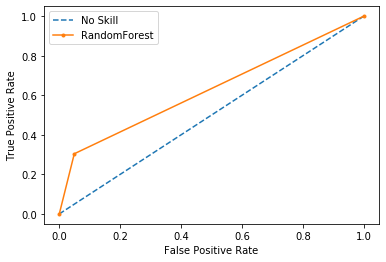

Variable: ws                   Importance: 0.19
Variable: pick_overall         Importance: 0.18
Variable: dws                  Importance: 0.08
Variable: ows                  Importance: 0.05
Variable: bpm                  Importance: 0.04
Variable: pts_pg               Importance: 0.04
Variable: tov_pct              Importance: 0.03
Variable: trb_p                Importance: 0.03
Variable: stl_p                Importance: 0.03
Variable: obpm                 Importance: 0.02
Variable: dbpm                 Importance: 0.02
Variable: trb_pct              Importance: 0.02
Variable: ast_pct              Importance: 0.02
Variable: blk_pct              Importance: 0.02
Variable: usg_pct              Importance: 0.02
Variable: fg_p                 Importance: 0.02
Variable: fg3_p                Importance: 0.02
Variable: ft_p                 Importance: 0.02
Variable: blk_p                Importance: 0.02
Variable: per                  Importance: 0.01
Variable: ts_pct               Importanc

In [248]:
evaluate(grid_search.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search.best_estimator_, feature_list)

In [238]:
from sklearn.model_selection import GridSearchCV
max_features = [None] + [int(x) for x in range(15,26,1)]
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)],
    'max_features' : max_features,
    'max_depth':[int(x) for x in range(2,10,2)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_new = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = 10, verbose = 2)
grid_search_new.fit(train_features, train_labels)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   19.1s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:   43.4s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed:  7.2min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  9.2min
[Parallel(n_jobs=10)]: Done 4881 tasks      | elapsed: 11.3min
[Parallel(n_jobs=10)]: Done 5760 out of 5760 | elapsed: 14.3min finished
/home/andrei/Facultate/tcri-all-star-prediction/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `ii

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [249]:
grid_search_new.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=94, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

              precision    recall  f1-score   support

NOT All-Star       0.92      0.91      0.91       142
    All-Star       0.48      0.52      0.50        23

    accuracy                           0.85       165
   macro avg       0.70      0.72      0.71       165
weighted avg       0.86      0.85      0.86       165

AUC: 0.715


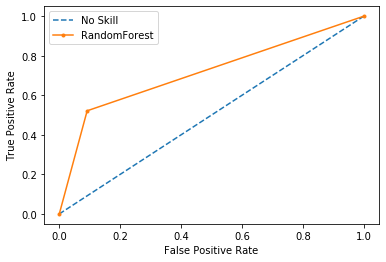

Variable: pick_overall         Importance: 0.33
Variable: ws                   Importance: 0.21
Variable: dws                  Importance: 0.06
Variable: stl_pct              Importance: 0.05
Variable: round                Importance: 0.04
Variable: dbpm                 Importance: 0.03
Variable: bpm                  Importance: 0.03
Variable: fg3_p                Importance: 0.03
Variable: trb_p                Importance: 0.03
Variable: per                  Importance: 0.02
Variable: obpm                 Importance: 0.02
Variable: trb_pct              Importance: 0.02
Variable: ast_pct              Importance: 0.02
Variable: tov_pct              Importance: 0.02
Variable: ows                  Importance: 0.02
Variable: ts_pct               Importance: 0.01
Variable: drb_pct              Importance: 0.01
Variable: def_rtg              Importance: 0.01
Variable: pts_pg               Importance: 0.01
Variable: ast_p                Importance: 0.01
Variable: stl_p                Importanc

In [247]:
evaluate(grid_search_new.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search_new.best_estimator_, feature_list)

In [237]:
from sklearn.tree import export_graphviz
# Export as dot file
fetures_name = features[fetures_select_all].drop(columns="allStar").columns
export_graphviz(best.estimators_[13], out_file='tree.dot', 
                feature_names = fetures_name,
                class_names = ["All-Star", "NOT All-Star"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [101]:
features[fetures_select_all].drop(columns="allStar").columns

Index(['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'round',
       'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p', 'trb_p',
       'ast_p', 'stl_p', 'blk_p'],
      dtype='object')